In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\dices\Downloads\Compressed\archive_6\ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


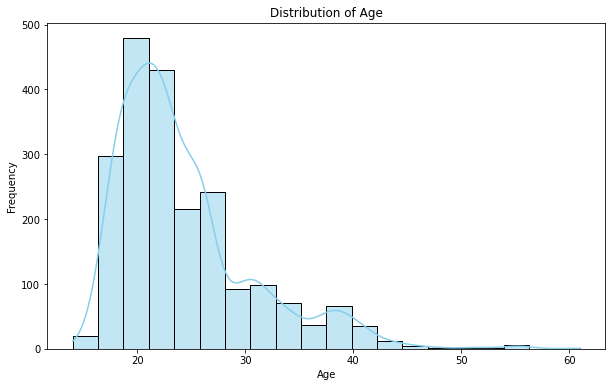

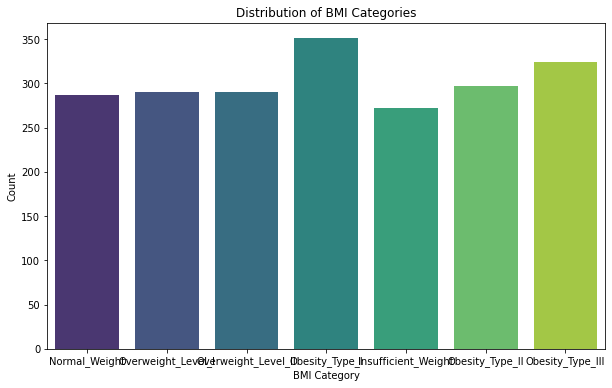

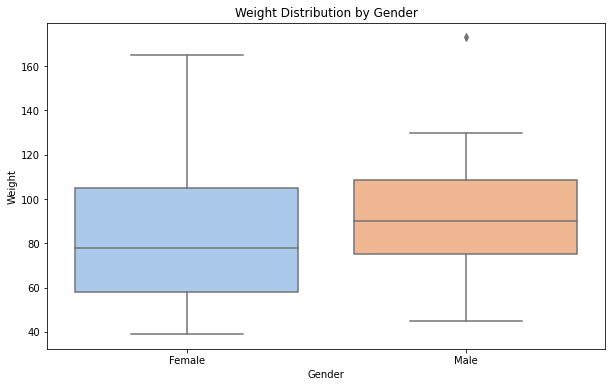

In [7]:
# Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of BMI categories (target variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df, palette='viridis')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

# Box plot of weight by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Weight', data=df, palette='pastel')
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

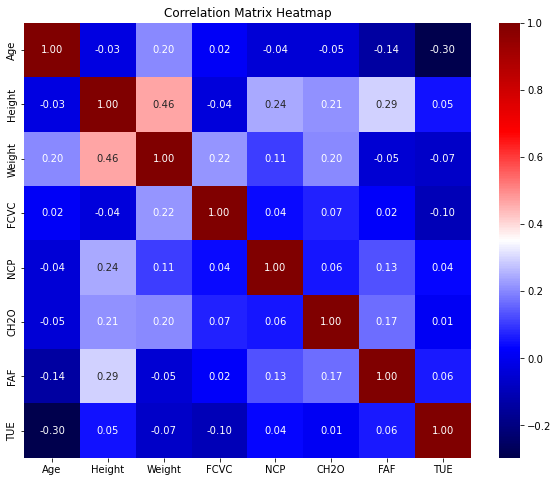

In [8]:
# Correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

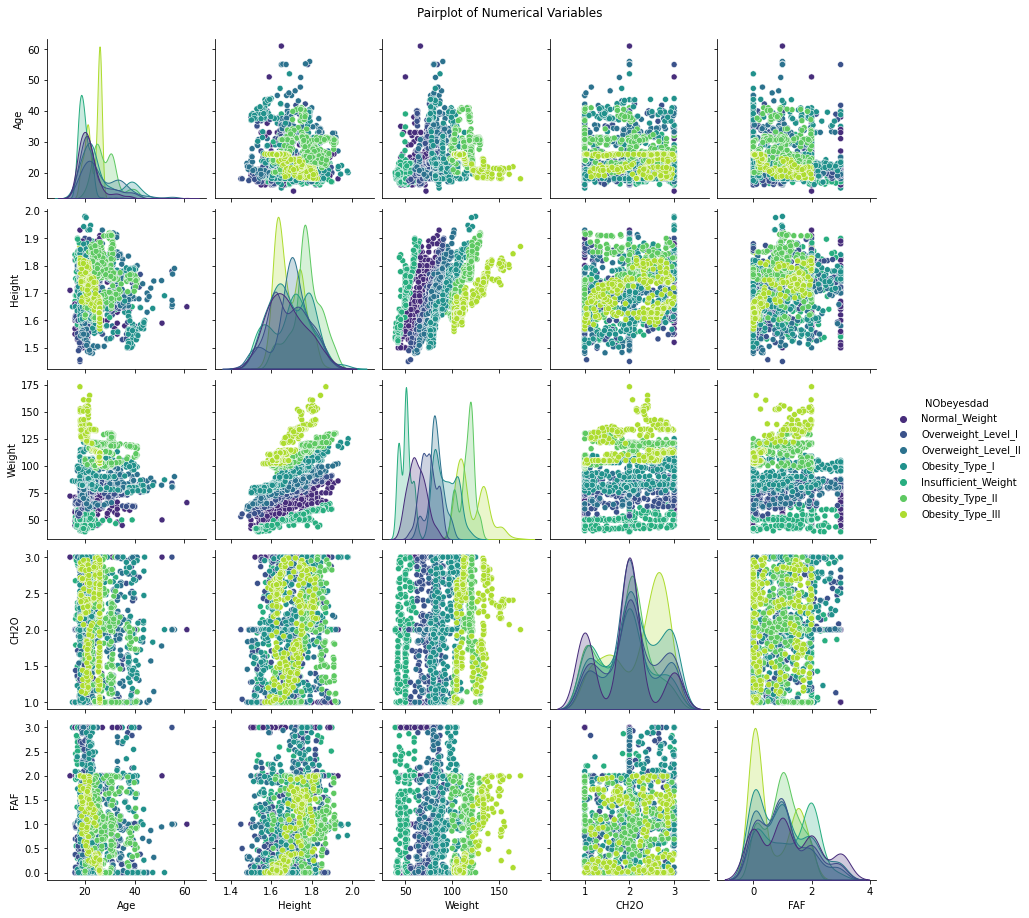

In [10]:
# Pairplot for numerical variables
sns.pairplot(df[['Age', 'Height', 'Weight', 'CH2O', 'FAF','NObeyesdad']], hue='NObeyesdad', palette='viridis')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


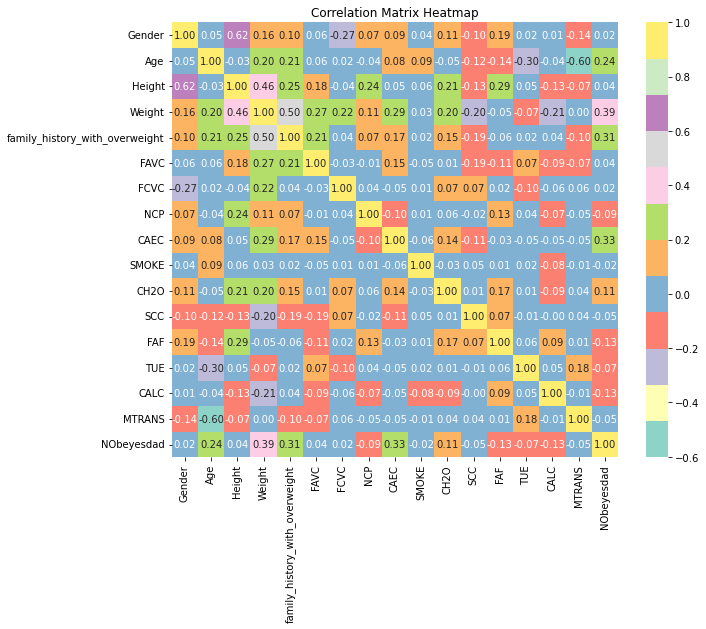

In [12]:
# Correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Set3', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Class Distribution:
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: NObeyesdad, dtype: int64


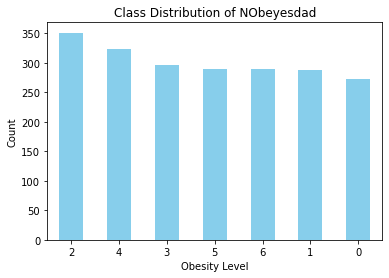

In [13]:
#check for class imbalance,
class_counts = df['NObeyesdad'].value_counts()

# Display the class distribution
print("Class Distribution:")
print(class_counts)

# Plot the class distribution
class_counts.plot(kind='bar', rot=0, color='skyblue')
plt.title('Class Distribution of NObeyesdad')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

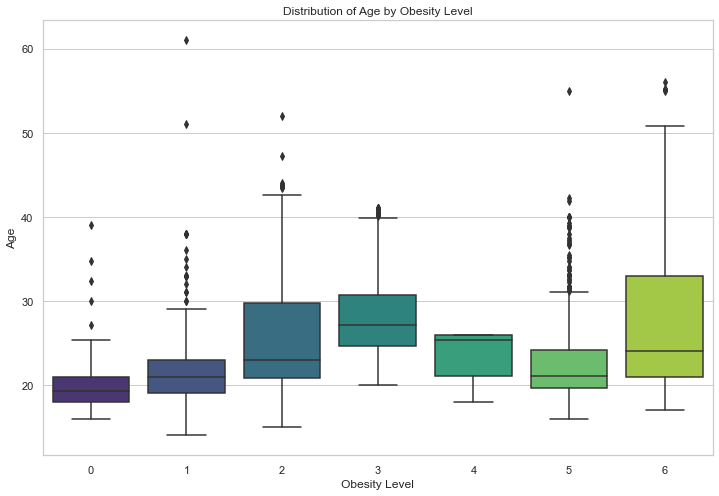

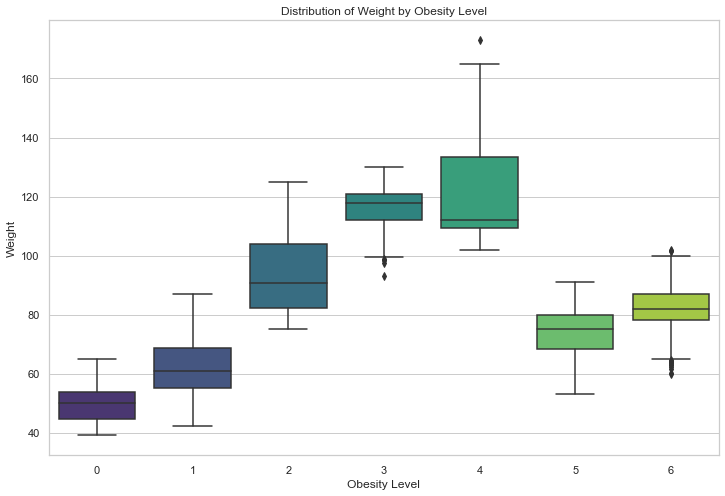

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Box plot of Age by Obesity Level
plt.figure(figsize=(12, 8))
sns.boxplot(x='NObeyesdad', y='Age', data=df, palette='viridis')
plt.title('Distribution of Age by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.show()

# Box plot of Weight by Obesity Level
plt.figure(figsize=(12, 8))
sns.boxplot(x='NObeyesdad', y='Weight', data=df, palette='viridis')
plt.title('Distribution of Weight by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix, and 'y' is your target variable
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Display classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.89      0.90      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423

